In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import random

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
df = pd.read_csv('/content/drive/MyDrive/DEPI/Housing.csv')

#EDA

In [173]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [174]:
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [175]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [176]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


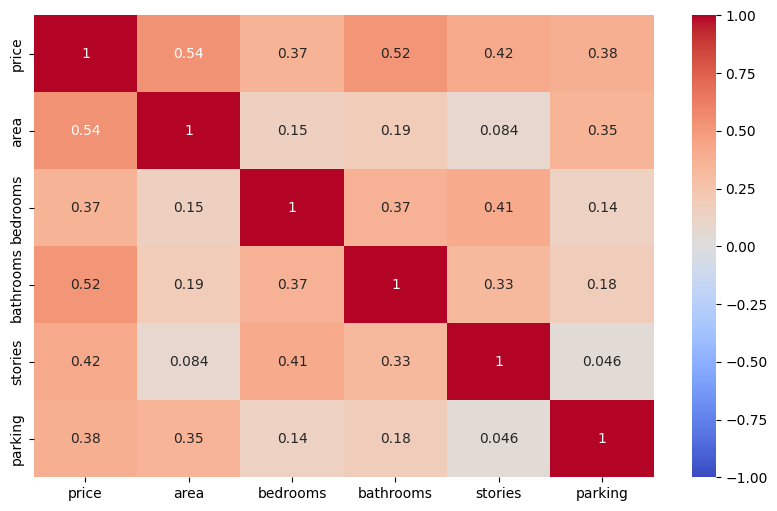

In [177]:
plt.figure(figsize=(10,6))
df_num = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories',
       'parking']]
sns.heatmap(df_num.corr(),cmap='coolwarm',annot=True,vmin=-1,vmax=1)
plt.show()


Based on high corr. Include all numerical features


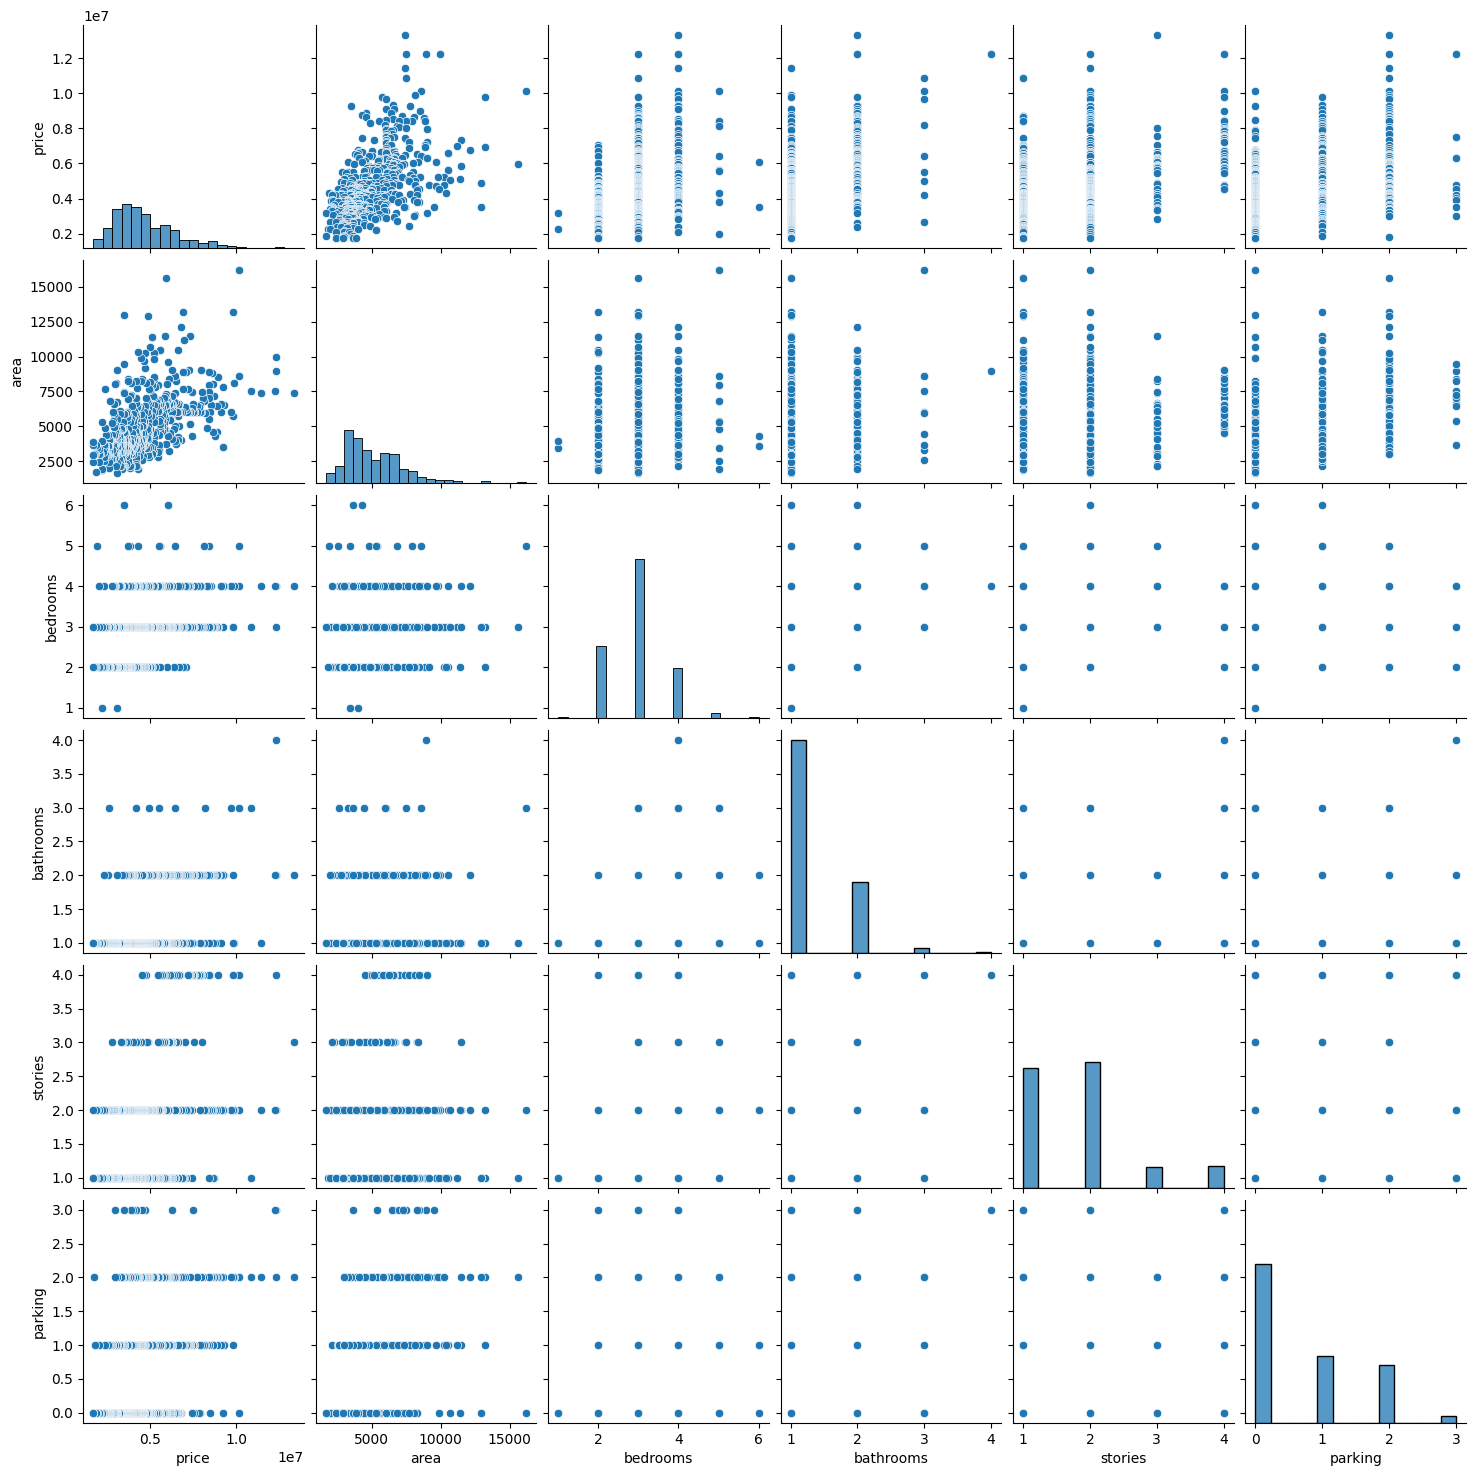

In [178]:
sns.pairplot(df)

#Outliers removal

<Axes: ylabel='price'>

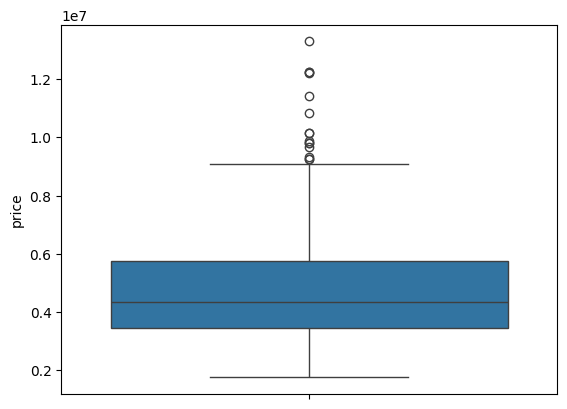

In [179]:
sns.boxplot(df['price'])

In [180]:
df['price'].quantile([0.85,0.1,0.9,0.15,0.95,0.99])

,price
0.85,6615000.0
0.10,2835000.0
0.90,7350000.0
0.15,3080000.0
0.95,8400000.0
0.99,10542000.0


In [181]:
df2 = df[(df['price']<df['price'].quantile(0.97))]


<ipython-input-182-af945ae8b577>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='price',data=df,palette='rainbow')
<ipython-input-182-af945ae8b577>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='price',data=df2,palette='rainbow')


<Axes: ylabel='price'>

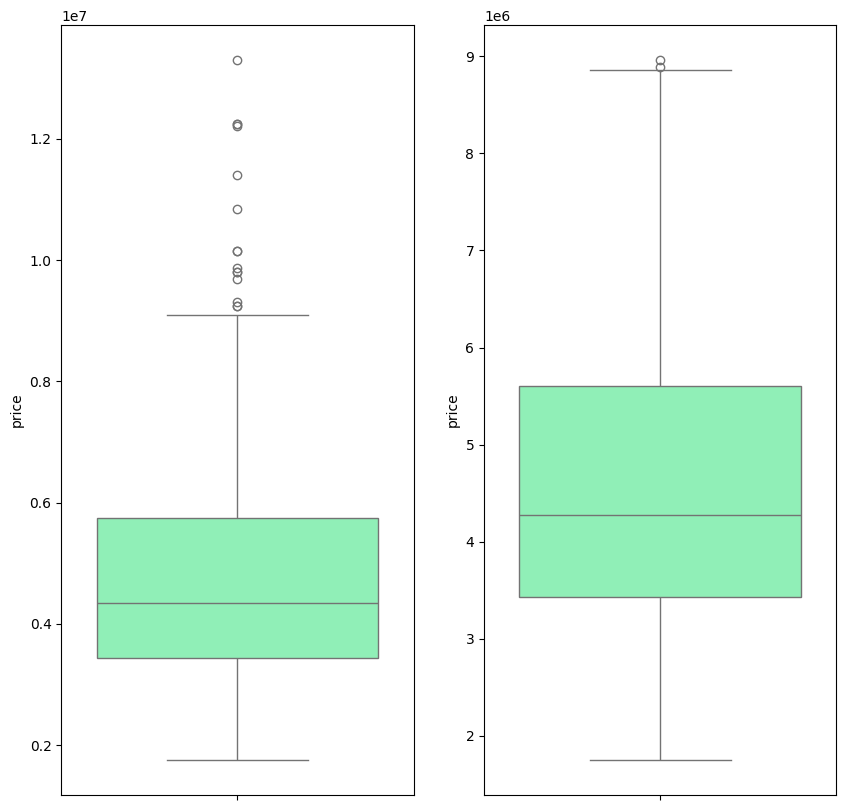

In [182]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(y='price',data=df,palette='rainbow')
plt.subplot(1,2,2)
sns.boxplot(y='price',data=df2,palette='rainbow')

Linear regression(Manually)

In [183]:
def square_trick(weight, bias, x, y, learning_rate):
    y_pred = np.dot(weight, x) + bias
    weight += x * (y - y_pred) * learning_rate
    bias += (y - y_pred) * learning_rate
    return weight, bias


In [184]:
def rmse(labels, predictions):
    m = len(labels)
    differences = labels - predictions
    return np.sqrt((1 / m) * np.dot(differences, differences))

In [185]:
def linear_regression_multivariate(features, labels, learning_rate=0.01, epochs=1000):
    if isinstance(features, pd.DataFrame):
      features = features.apply(LabelEncoder().fit_transform)
      features = features.to_numpy(dtype=float)
      labels = labels.to_numpy(dtype=float)
      scaler = StandardScaler()
      features = scaler.fit_transform(features)


    num_features = features.shape[1]
    weight = np.random.random(num_features)
    bias = np.random.random()
    errors = []
    rmse_t = 0
    for i in range(epochs):
      predictions = np.dot(features, weight) + bias
      rmseEP = rmse(labels, predictions)
      errors.append(rmseEP)
      rmse_t += rmseEP
      i = random.randint(0, len(features) - 1)
      x = features[i]
      y = labels[i]
      weight, bias = square_trick(weight, bias, x, y, learning_rate)
    return weight, bias, errors , rmse_t


In [186]:
df2[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']] = df2[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']].astype('category')

<ipython-input-186-e0e8ce6a4187>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']] = df2[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']].astype('category')


In [187]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 17 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             528 non-null    int64   
 1   area              528 non-null    int64   
 2   bedrooms          528 non-null    int64   
 3   bathrooms         528 non-null    int64   
 4   stories           528 non-null    int64   
 5   mainroad          528 non-null    category
 6   guestroom         528 non-null    category
 7   basement          528 non-null    category
 8   hotwaterheating   528 non-null    category
 9   airconditioning   528 non-null    category
 10  parking           528 non-null    int64   
 11  prefarea          528 non-null    category
 12  furnishingstatus  528 non-null    category
dtypes: category(7), int64(6)
memory usage: 33.3 KB


In [188]:
df2 = pd.get_dummies(df2,drop_first=True)

In [189]:
df2

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
17,8960000,8500,3,2,4,2,True,False,False,False,True,False,False,False
18,8890000,4600,3,2,2,2,True,True,False,False,True,False,False,False
19,8855000,6420,3,2,2,1,True,False,False,False,True,True,True,False
20,8750000,4320,3,1,2,2,True,False,True,True,False,False,True,False
21,8680000,7155,3,2,1,2,True,True,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [190]:
x = df2.drop(['price'],axis = 1)
y = df2['price']

In [191]:

weight, bias, errors, rmse_t = linear_regression_multivariate(x, y, learning_rate=0.001, epochs=10000)
print( "Weight:", weight)
print("Bias:", bias)
print("RMSE", f'{rmse_t:.4f}')


Weight: [ 507782.08013178   21390.20086723  425543.32250774  348793.19212529
  170017.59107768  146932.83279222  143555.90851295  146334.2744019
  141890.43638395  343492.87301254  188551.79356786  -64568.5848593
 -213794.47604604]
Bias: 4625514.157473956
RMSE 11748255251.4803


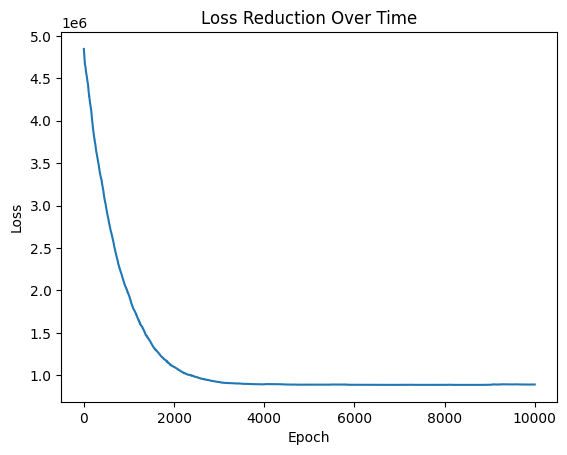

In [192]:
plt.plot(errors)
plt.title("Loss Reduction Over Time")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [194]:
x = df2.drop('price',axis = 1)
y = df2['price']

In [195]:
X_train , X_test , y_train , y_test = train_test_split(x,y ,test_size = 0.3 ,random_state=101)
model = LinearRegression()


In [196]:

model.fit(X_train,y_train)


LinearRegression()

In [197]:
y_pred = model.predict(X_test)

In [198]:
from sklearn import metrics
Mae = metrics.mean_absolute_error(y_test,y_pred)
Mse = metrics.mean_squared_error(y_test,y_pred)
Rmse = np.sqrt(Mse)
r2 = metrics.r2_score(y_test,y_pred)

print('Mean Absolute Error:',Mae)
print('Mean Squared Error:',Mse)
print('Root Mean Squared Error:',Rmse)
print('R2 Score:',r2)

Mean Absolute Error: 730220.1526531386
Mean Squared Error: 842559554827.4254
Root Mean Squared Error: 917910.4285426904
R2 Score: 0.6382313762516258


Comparing the results RMSE of SKLearn is far better than manual method.